In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [2]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
covid_data_path = os.path.join(raw_data_path, 'covid-19-data.csv')
covid_df = pd.read_csv(covid_data_path)

## EDA PART - 1

In [3]:
covid_df.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1


In [4]:
covid_df[['Country', 'Region']].nunique()

Country    211
Region       6
dtype: int64

In [5]:
#Getting the proportion of countries per region which implies EURO has the highest proportion with about 32% of countries
covid_r = covid_df.Region.value_counts(normalize=True)
covid_r

EURO     0.328205
AMRO     0.213935
AFRO     0.161538
WPRO     0.122074
EMRO     0.111260
SEARO    0.062988
Name: Region, dtype: float64

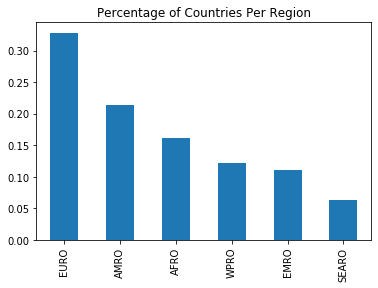

In [6]:
covid_r.plot(kind='bar', title='Percentage of Countries Per Region')

In [7]:
covid_df[['Deaths', 'Confirmed']].describe()

,Deaths,Confirmed
count,9042.000000,9042.000000
mean,14.492037,220.745742
std,101.195444,1481.635096
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.000000
75%,1.000000,33.000000
max,2395.000000,35386.000000


In [66]:
covid_af = covid_df.loc[covid_df['Country'] == 'AF']
covid_af[['Deaths','Confirmed']].describe()

,Deaths,Confirmed
count,53.000000,53.000000
mean,0.547170,14.981132
std,1.084259,23.313491
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,1.000000,29.000000
max,4.000000,110.000000


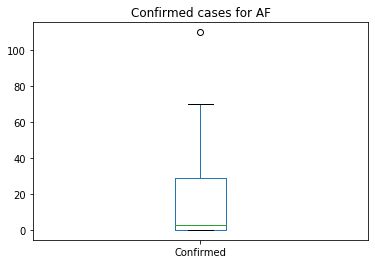

In [67]:
covid_af = covid_df.loc[covid_df['Country'] == 'AF']
covid_af.Confirmed.plot(kind='box', title='Confirmed cases for AF')

In [64]:
#Number of Countries in the EMRO Region amounts to 22 Countries
covid_emro = covid_df.loc[(covid_df['Region'] == 'EMRO')]
covid_emro[['Country', 'Region']].nunique()

Country    22
Region      1
dtype: int64

In [11]:
def summarystats (country, code):
    covid_any = covid_df[covid_df['Country'] == code]
    #return print(country)
    return covid_any[['Deaths', 'Confirmed']].describe(); return print(country)

In [12]:
summarystats('Afganistan', 'AF')

,Deaths,Confirmed
count,53.000000,53.000000
mean,0.547170,14.981132
std,1.084259,23.313491
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,1.000000,29.000000
max,4.000000,110.000000


## EDA Part-2

### Distributions Univariate

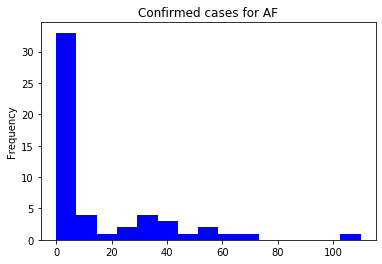

In [68]:
#Univariate Histogram distribution for AF, which is rightly skewed, you can optionally specify the number of bins
covid_af.Confirmed.plot(kind='hist', title='Confirmed cases for AF', color='blue', bins=15)

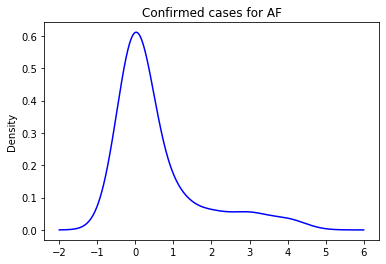

In [69]:
#kde plot indicates positive skweness for AF as well with 0 being the most frequent occuring value
covid_af.Deaths.plot(kind='kde', title='Confirmed cases for AF', color='blue')

In [15]:
print('Skewness for Deaths in AF is : {0:.2f}'.format(covid_af.Deaths.skew()))
print('Skewness for Confirmed in AF is : {0:.2f}'.format(covid_af.Confirmed.skew()))

Skewness for Deaths in AF is : 4.98
Skewness for Confirmed in AF is : 5.28


### Distributions Bivariate

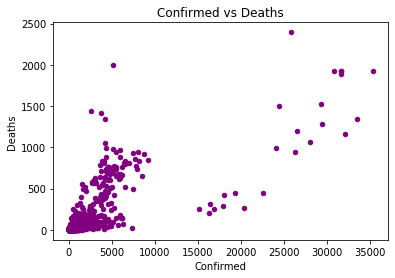

In [211]:
#Checking the relationship between confirmed cases and Death cases in AF to see of any pattern exits, you can set alpha value to control opacity
#As confirmed cases increase number of deaths increase as well in 10,000 confirmed cases there was about 1000 deaths in AF
covid_df.plot.scatter(x='Confirmed', y='Deaths', color='purple', title='Confirmed vs Deaths')

### Groupings and Aggregations, Crosstabs and pivot tables, additional univariate and bivariate analysis

In [17]:
#You can compute the mean, median, sum, std and more using groupings and aggregations

In [260]:
covid_df.groupby(['Region']).Deaths.mean()

Region
AFRO      0.379572
AMRO     15.760813
EMRO      5.645291
EURO     30.338655
SEARO     1.817699
WPRO      3.883105
Name: Deaths, dtype: float64

In [219]:
covid_df.groupby(['Country Name']).Confirmed.sum().sort_values(ascending=False)

Country Name
United States of America     604070
Spain                        177633
Italy                        165155
Germany                      130450
France                       105155
                              ...  
Anguilla                          3
British Virgin Islands            3
Papua New Guinea                  2
Saint Pierre and Miquelon         1
Yemen                             1
Name: Confirmed, Length: 213, dtype: int64

In [273]:
aggs = {
    'Deaths': {
        'mean_Death':'mean',
        'media_Death':'median',
        'max_Death':max,
        'min_Death':np.min,
    },
    
    'Confirmed': {
        'mean_Confirmed':'mean',
        'media_Confirmed':'median',
        'max_Confirmed':max,
        'min_Confirmed':np.min,
    }
}

In [285]:
#covid_af.groupby(['Region']).agg({'Death':'mean'})

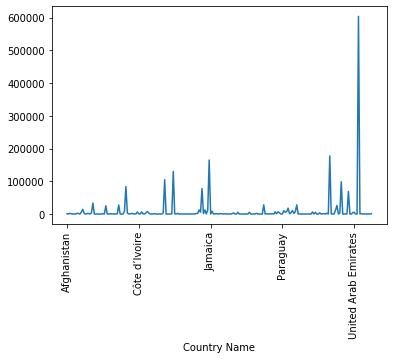

In [245]:
covid_df.groupby(['Country Name']).Confirmed.sum().plot(kind='line', rot=90)

In [83]:
covid_df.groupby(['Region']).Deaths.sum().sort_values(ascending=False)

Region
EURO     89317
AMRO     30245
EMRO      5634
WPRO      4252
SEARO     1027
AFRO       550
Name: Deaths, dtype: int64

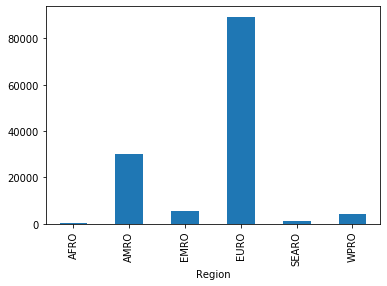

In [244]:
#bar plot for sum of deaths at Regional level
covid_df.groupby(['Region']).Deaths.sum().plot(kind='bar')

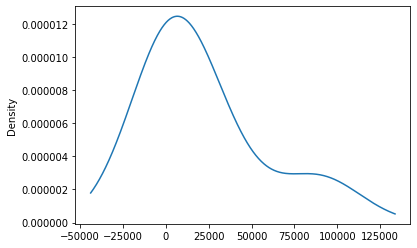

In [221]:
#kde plot for sum of deaths at Regional level
covid_df.groupby(['Region']).Deaths.sum().plot(kind='kde')

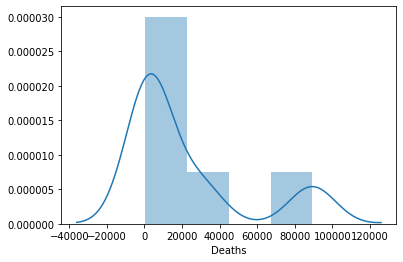

In [166]:
#kde plot plus hist plot combined, kde can be set to False and you can set the number of bins as well
sns.distplot(covid_df.groupby(['Region']).Deaths.sum())

In [128]:
#Grouping Confirmed cases and Deaths by Region
covid_df.groupby(['Region'])['Confirmed', 'Deaths'].sum().sort_values(ascending=False, by='Confirmed')

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths
Region,,
EURO,1013093,89317
AMRO,707121,30245
WPRO,125779,4252
EMRO,114910,5634
SEARO,22525,1027
AFRO,11843,550


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


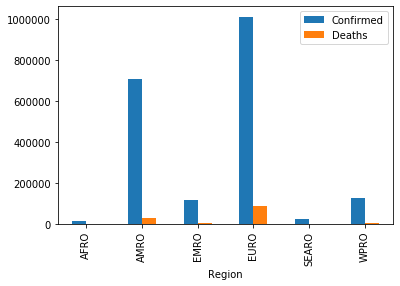

In [22]:
#Plotting Confirmed cases and Deaths by Region
covid_df.groupby(['Region'])['Confirmed', 'Deaths'].sum().plot(kind='bar')

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


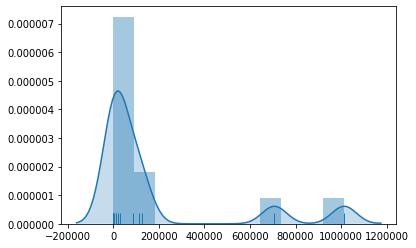

In [172]:
#comparing histogram and distplot/kde combined, optionally kde can be set to False and bins set optionally as well
sns.distplot(covid_df.groupby(['Region'])['Confirmed', 'Deaths'].sum(), rug=True, hist=True, kde_kws={'shade':True})

In [129]:
covid_df.groupby(['Region','Country'])['Confirmed', 'Deaths'].sum().sort_values(ascending=False, by='Confirmed')

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Confirmed  Deaths
Region Country                   
AMRO   US          604070   25871
EURO   ES          177633   18579
       IT          165155   21647
       DE          130450    3569
       FR          105155   17146
...                   ...     ...
AMRO   VG               3       0
       AI               3       0
WPRO   PG               2       0
EMRO   YE               1       0
AMRO   PM               1       0

[211 rows x 2 columns]

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


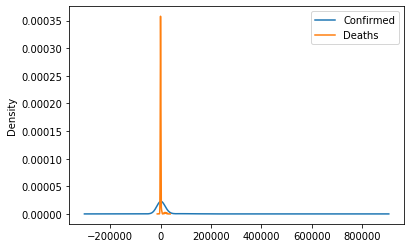

In [251]:
#kde plot for confirmed and death cases per countries per region
covid_df.groupby(['Region','Country'])['Confirmed', 'Deaths'].sum().sort_values(ascending=True, by='Confirmed').plot(kind='kde')

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


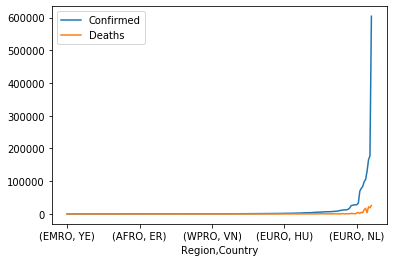

In [250]:
#line plot for confirmed and death cases per countries per region
covid_df.groupby(['Region','Country'])['Confirmed', 'Deaths'].sum().sort_values(ascending=True, by='Confirmed').plot(kind='line')

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


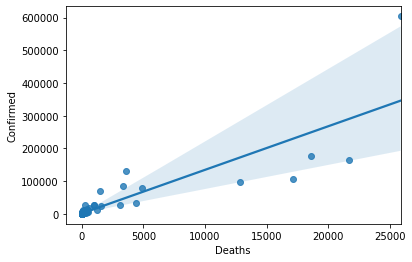

In [185]:
#Regression plot for confirmed and death cases
ct = covid_df.groupby(['Region','Country'])['Confirmed', 'Deaths'].sum().sort_values(ascending=False, by='Confirmed')
sns.regplot(x='Deaths', y='Confirmed', data=ct)

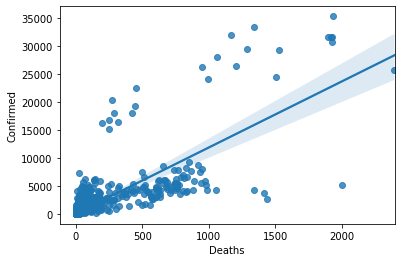

In [187]:
##Regression plot for confirmed and death cases for general covid data
sns.regplot(x='Deaths',y='Confirmed',data=covid_df)

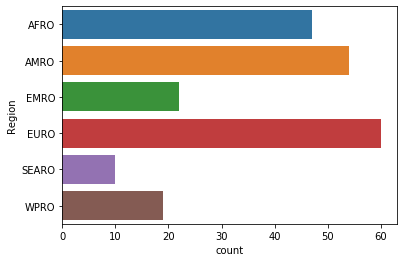

In [178]:
# Getting and plotting the Number of Countries per region
covid_rc=pd.DataFrame(covid_df.groupby(['Region'])['Country Name'].value_counts(sort=True))
covid_rc = covid_rc.stack().reset_index()
covid_rc = covid_rc.get(['Region', 'Country Name']).set_index('Country Name')
covid_rc
sns.countplot(y=covid_rc.Region)

In [216]:
pd.crosstab(covid_df.Region, covid_df.Country)

Country,AD,AE,AF,AG,AI,AL,AM,AO,AR,AT,...,VE,VG,VI,VN,XK,YE,YT,ZA,ZM,ZW
Region,,,,,,,,,,,,,,,,,,,,,
AFRO,0,0,0,0,0,0,0,27,0,0,...,0,0,0,0,0,0,34,43,30,28
AMRO,0,0,0,35,22,0,0,0,45,0,...,34,22,35,0,0,0,0,0,0,0
EMRO,0,79,53,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
EURO,46,0,0,0,0,39,47,0,0,52,...,0,0,0,0,35,0,0,0,0,0
SEARO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WPRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,84,0,0,0,0,0,0


In [203]:
#using crosstab displays number of occurance of the values in the Death column, zero occurs 1288 times in this data within the AFRO Region
pd.crosstab(covid_df.Region, covid_df.Deaths)

Deaths,0,1,2,3,4,5,6,7,8,9,...,1438,1504,1528,1895,1920,1925,1928,1931,2003,2395
Region,,,,,,,,,,,,,,,,,,,,,
AFRO,1288,92,36,8,4,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AMRO,1514,131,46,24,28,14,14,12,12,5,...,0,1,1,1,1,1,1,1,0,1
EMRO,709,94,37,29,25,20,9,8,4,4,...,0,0,0,0,0,0,0,0,0,0
EURO,1873,234,134,73,55,40,33,21,25,16,...,1,0,0,0,0,0,0,0,1,0
SEARO,457,30,10,12,7,3,5,3,2,3,...,0,0,0,0,0,0,0,0,0,0
WPRO,815,63,30,35,26,16,17,9,11,2,...,0,0,0,0,0,0,0,0,0,0


In [209]:
#sums up the number of occurances of values in the death column
pd.crosstab(covid_df.Region, covid_df.Deaths.sum())

col_0,131037
Region,
AFRO,1449
AMRO,1919
EMRO,998
EURO,2944
SEARO,565
WPRO,1095


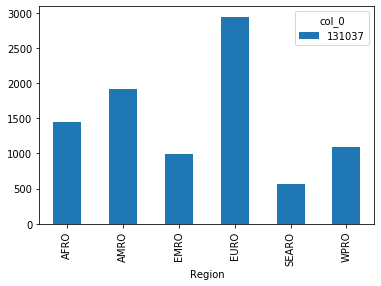

In [208]:
#Crosstab sum of deaths per Region
pd.crosstab(covid_df.Region, covid_df.Deaths.sum()).plot(kind='bar')

###### Your HomeWork is to Carry out univariate and bivariate analysis distributions per Region

In [193]:
#Using Pivot Tables, very useful for numerical features of categorical variables
covid_df.pivot_table(index='Region', columns='Country', values='Confirmed', aggfunc='sum')

Country,AD,AE,AF,AG,AI,AL,AM,AO,AR,AT,...,VE,VG,VI,VN,XK,YE,YT,ZA,ZM,ZW
Region,,,,,,,,,,,,,,,,,,,,,
AFRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,221.0,2506.0,48.0,23.0
AMRO,NaN,NaN,NaN,23.0,3.0,NaN,NaN,NaN,2477.0,NaN,...,193.0,3.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMRO,NaN,5365.0,794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
EURO,673.0,NaN,NaN,NaN,NaN,494.0,1135.0,NaN,NaN,14370.0,...,NaN,NaN,NaN,NaN,397.0,NaN,NaN,NaN,NaN,NaN
SEARO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WPRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,NaN


## EDA Part-3